In [26]:

# -*- coding: utf-8 -*-
"""
Created on Sun Aug 16 17:10:53 2020

@author: wanxiang.shen@u.nus.edu
"""

import warnings, os
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
from glob import glob

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score
from sklearn.metrics import auc as calculate_auc

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


import seaborn as sns




In [27]:
imgs = glob('./IMG_EXAMPLE/*.png')

In [28]:
res = []

for i in imgs:
    img=mpimg.imread(i)
    img = img.reshape(102,102,1)
    idx = int(i.split('_')[-2])
    res.append([img, idx])


In [29]:
x1 = pd.DataFrame(res).sort_values(1)[0].tolist()

In [30]:
X = np.concatenate(x1, axis=-1)

In [33]:
classes = ['ACC', 'BLCA', 'BRCA', 'CESC', 'CHOL', 'COAD', 'DLBC', 'ESCA', 'GBM', 'HNSC',
           'KICH', 'KIRC', 'KIRP', 'LAML', 'LGG', 'LIHC', 'LUAD', 'LUSC', 'MESO', 'OV', 'PAAD', 'PCPG', 'PRAD',
           'READ', 'SARC', 'SKCM', 'STAD', 'TGCT', 'THCA', 'THYM', 'UCEC', 'UCS', 'UVM']

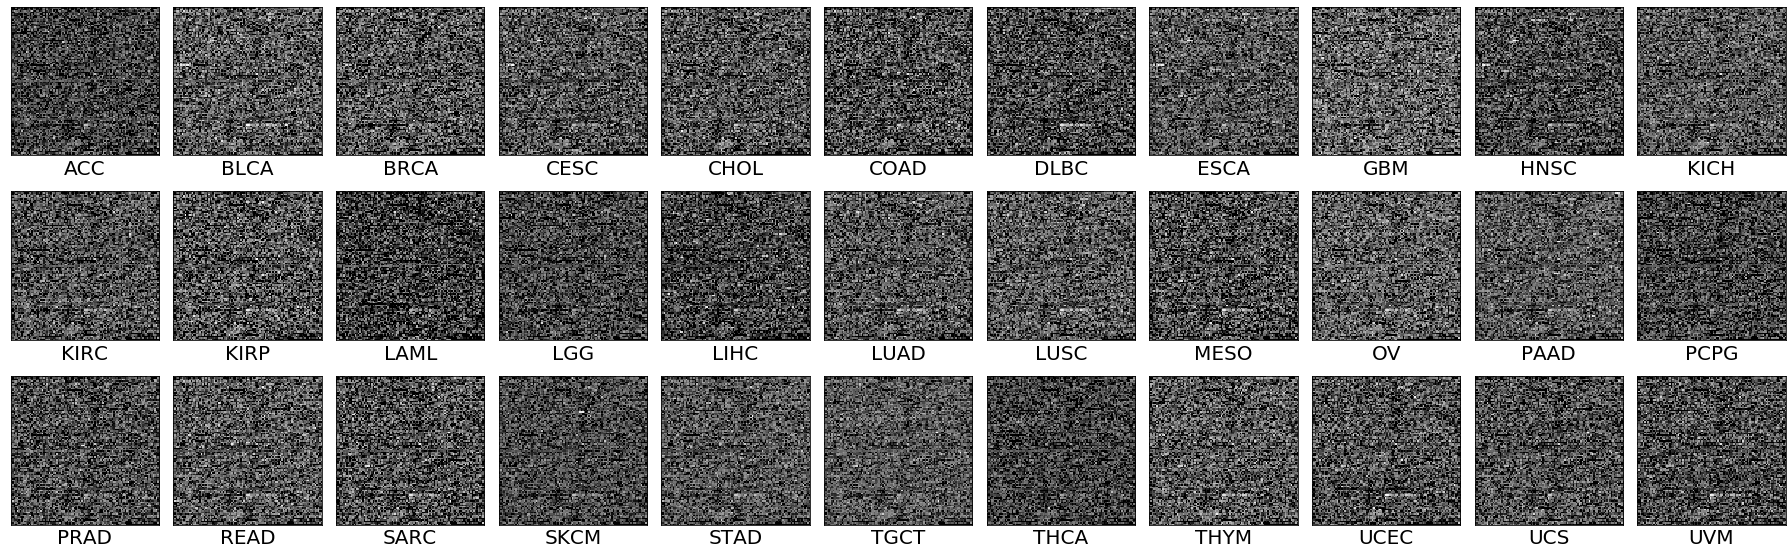

In [35]:
fontsize = 20
fig, axes = plt.subplots(nrows=3, ncols=11, figsize=(25, 8), sharex = True, sharey = True)

for i, ax in zip(range(33), axes.ravel()):
    pid_name = classes[i]
    x = X[:,:,i]
    ax.imshow(x, cmap = 'gray')
    ax.set_xticks([])
    ax.set_yticks([])
    #show.imshow(x.sum(axis=-1).reshape(102,102,1), ax = ax,  mode = 'dark', color_list= ['gray'], x_max=1) #
    ax.set_xlabel(pid_name, fontsize = fontsize) 

    
fig.tight_layout()
fig.savefig('./previous-fmp-1.png', bbox_inches='tight', dpi=400) 
# fig.savefig('./fmp.svg', bbox_inches='tight', dpi=400) 